In [462]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [535]:
NAVI = get_pricing('NAVI',start_date='2014-06-15',
                    end_date = '2019-08-10',
                    frequency= 'daily')

SLM = get_pricing('SLM',start_date='2014-06-15',
                    end_date = '2019-08-10',
                    frequency= 'daily')

In [562]:
navi=NAVI['close_price']
slm=SLM['close_price']


2014-06-16 00:00:00+00:00    13.372
2014-06-17 00:00:00+00:00    13.428
2014-06-18 00:00:00+00:00    13.603
2014-06-19 00:00:00+00:00    13.707
2014-06-20 00:00:00+00:00    13.922
Freq: C, Name: close_price, dtype: float64

In [537]:
#There seems to be a correlation in the percent changes over a window for these two stocks lets test it 

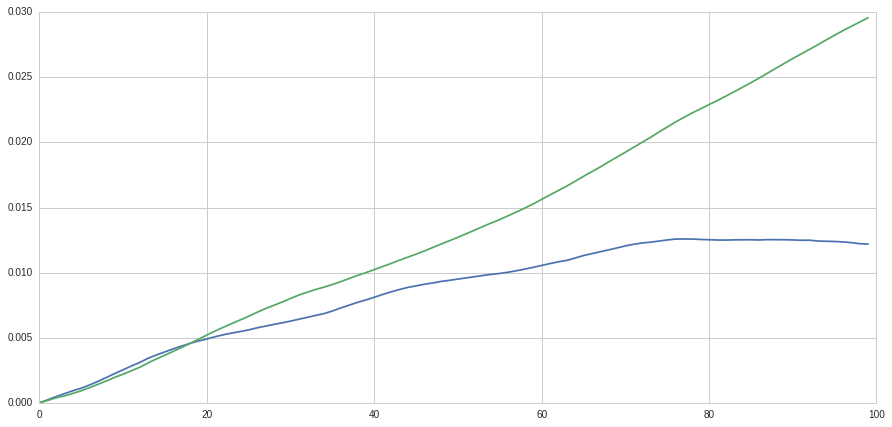

In [538]:
params= (0,100,1)  #params mus be set as a toople
A = pd.Series(index=range(len(range(params[0],params[1],params[2]))))
B = pd.Series(index=range(len(range(params[0],params[1],params[2]))))
for t in range(params[0],params[1],params[2]):
    T = len(range(params[0],params[1],params[2]))
    n_pct=NAVI['close_price'].pct_change(periods=t)
    s_pct=SLM['close_price'].pct_change(periods=t)
    n_roll=n_pct.replace([np.inf, -np.inf], np.nan)
    n_roll.dropna(inplace=True)
    nm=n_roll.mean()
    A[t] = nm
    A.dropna(inplace=True)
    s_roll=s_pct.replace([np.inf, -np.inf], np.nan)
    s_roll.dropna(inplace=True)
    sm=s_roll.mean()
    B[t] = sm
    B.dropna(inplace=True)    
plt.figure(figsize=(15,7))
plt.plot(A)
plt.plot(B)
#graphing the rolling percent change 


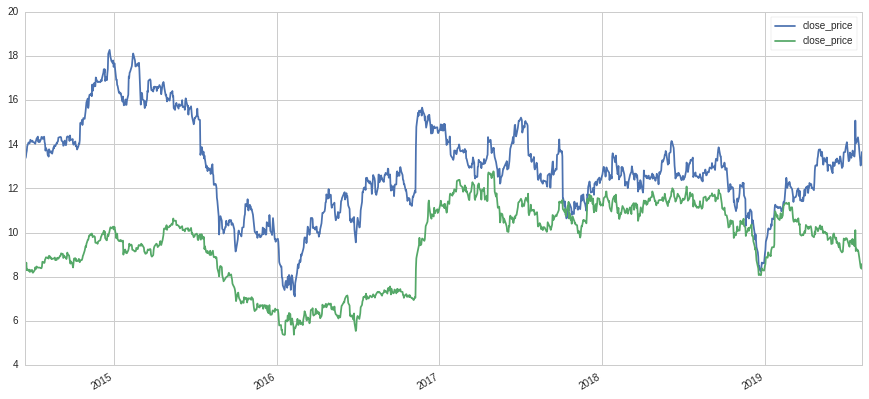

In [539]:
navi=NAVI['close_price']
slm=SLM['close_price']
pd.concat([navi,slm],axis=1).plot(figsize=(15,7))
navi_pct5=NAVI['close_price'].pct_change(periods=5)
plt.show()

(735398.0, 737270.0)

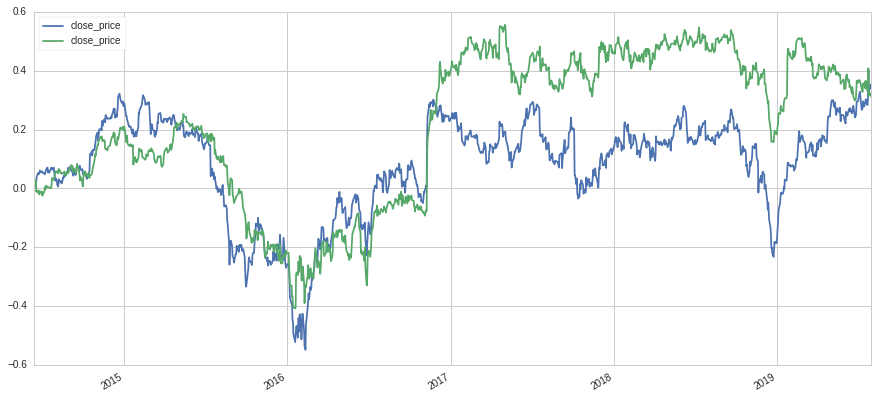

In [540]:
navi_pct_cs=NAVI['close_price'].pct_change().cumsum()
slm_pct_cs=SLM['close_price'].pct_change().cumsum()
pd.concat([navi_pct_cs,slm_pct_cs],axis=1).plot(figsize=(15,7))
plt.xlim('2014-06-14','2019-07-30')

In [541]:
spread = abs((navi_pct5 - slm_pct5))
spread.dropna().describe()

count    1293.000000
mean        0.028561
std         0.024942
min         0.000048
25%         0.009664
50%         0.021472
75%         0.040705
max         0.158575
Name: close_price, dtype: float64

In [542]:
spread.dropna().describe()[2]*2+ spread.mean()

0.078445515192352225

(735689.0, 736084.0)

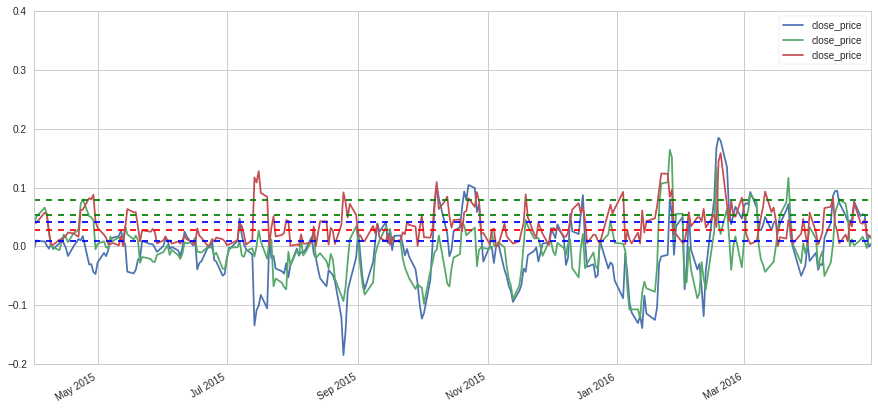

In [543]:
navi_pct5=NAVI['close_price'].pct_change(periods=5)
slm_pct5=SLM['close_price'].pct_change(periods=5)
spread = abs((navi_pct5 - slm_pct5))
pd.concat([navi_pct5,slm_pct5,spread],axis=1).plot(figsize=(15,7))
plt.axhline(spread.mean(), color='red', linestyle='--')
plt.axhline(spread.dropna().describe()[4], color='blue', linestyle='--')
plt.axhline(spread.dropna().describe()[6], color='blue', linestyle='--')
plt.axhline(spread.dropna().describe()[2]*2+ spread.mean(), color='green', linestyle='--')
plt.axhline(spread.dropna().describe()[2] + spread.mean(), color='green', linestyle='--')
plt.xlim('2015-04-01','2016-04-30')

#pd.concat([navi,slm],axis=1).plot(figsize=(15,7))
#plt.xlim('2015-04-01','2016-04-30')



In [544]:
navi_pct_chg=NAVI['close_price'].pct_change(periods=5)
slm_pct_chg=SLM['close_price'].pct_change(periods=5)

In [545]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [546]:
ratios = (slm_pct_chg / navi_pct_chg)
ratios = ratios.replace([np.inf, -np.inf], [0,0])

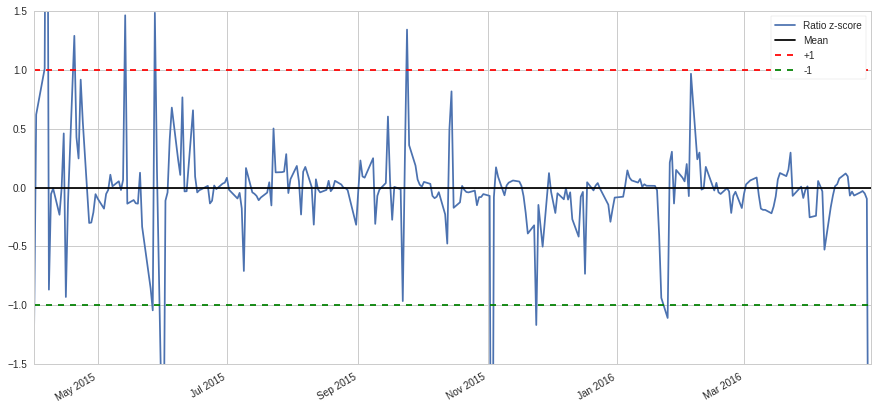

In [547]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.ylim(-1.5,1.5)
plt.xlim('2015-04-01','2016-04-30')

plt.show()

#find where z score is bigger than 1 or less than -1 concatenate to df. add dots were true 

In [548]:
df=pd.concat([navi,spread,z_ratio],keys=["price","spread","z_ratio"],axis=1)
df['label'] = 'out of bounds'
df.loc[df['z_ratio'] > 1 , 'label'] = 'spread_zratio'
df.loc[df['spread'] > 0.040705 , 'label'] = 'spread_over_75'


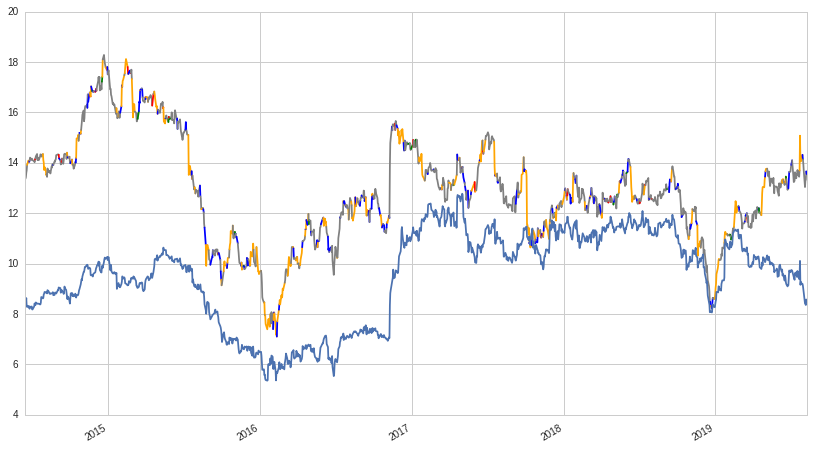

In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Simulate data
df= pd.concat([navi,spread,z_ratio],keys=["price","spread","z_ratio"],axis=1)


##Apply Labels 
df['label'] = 'out of bounds'
df.loc[df['spread'] > 0.028561 , 'label'] = 'spread_mean'
df.loc[df['z_ratio'] > 1 , 'label'] = 'zratio_o1'
df.loc[df['z_ratio'] < -1 , 'label'] = 'zratio_u1'
df.loc[df['spread'] > 0.040705 , 'label'] = 'spread_over_75'


## Convert labels to colors
label2color = {
    'out of bounds': 'grey',
    'zratio_o1': 'red',
    'zratio_u1': 'green',
    'spread_over_75': 'orange',
    'spread_mean': 'blue'
}
df['color'] = df['label'].apply(lambda label: label2color[label])


# Create plot
fig, ax = plt.subplots()

def gen_repeating(s):
    """Generator: groups repeated elements in an iterable
    E.g.
        'abbccc' -> [('a', 0, 0), ('b', 1, 2), ('c', 3, 5)]
    """
    i = 0
    while i < len(s):
        j = i
        while j < len(s) and s[j] == s[i]:
            j += 1
        yield (s[i], i, j-1)
        i = j

## Add px_last lines
for color, start, end in gen_repeating(df['color']):
    if start > 0: # make sure lines connect
        start -= 1
    idx = df.index[start:end+1]
    df.loc[idx, 'price'].plot(ax=ax, color=color, label='')


## Get artists and labels for legend and chose which ones to display


# Display plot
plt.plot(slm)

plt.show()
#pd.concat([navi_pct_cs,slm_pct_cs],axis=1).plot(figsize=(15,7))



In [550]:
spread.dropna().describe()[2]*2+ spread.mean()

0.078445515192352225

In [551]:
spread = abs((navi_pct5 - slm_pct5))
spread.dropna().describe()

count    1293.000000
mean        0.028561
std         0.024942
min         0.000048
25%         0.009664
50%         0.021472
75%         0.040705
max         0.158575
Name: close_price, dtype: float64

In [558]:
spread = abs((navi_pct5 - slm_pct5))
print(len(ratios))
print(len(spread))
train = spread[:914]
test = spread[914:]

1298
1298


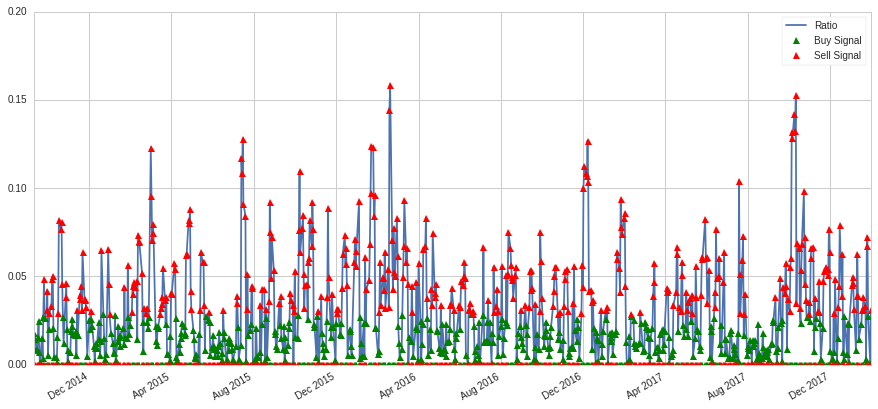

In [553]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[spread > 0.028561] = 0
sell[spread< 0.028561] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.ylim(0,.2)
plt.show()

In [554]:
#There seems to be a correlation in the percent changes over a window for these two stocks lets test it 


In [555]:
buy[spread > 0.028561] = 0
len(buy)

914

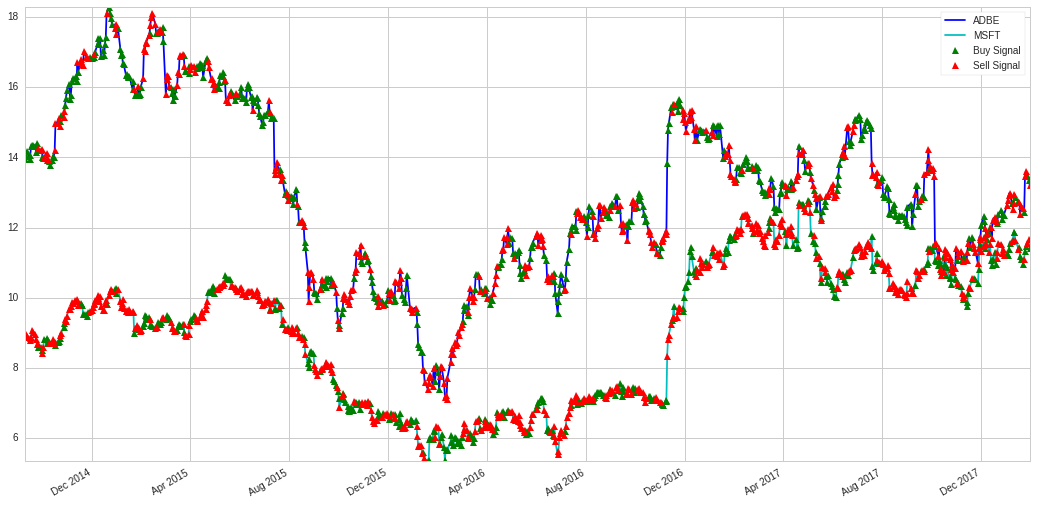

In [556]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 =NAVI['close_price'].iloc[:914]
S2 =SLM['close_price'].iloc[:914]


S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['ADBE','MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()

In [585]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratio = 0.5
    #ma1 = ratios.rolling(window=window1, center=False).mean()
    #ma2 = ratios.rolling(window=window2, center=False).mean()
    #std = ratios.rolling(window=window2, center=False).std()
    #zscore = (ma1 - ma2)/std
    spread = abs((navi_pct5 - slm_pct5))
    
    
    # Simulate trading
    # Start with no money and no positions
    money = 20
    countS1 = 0
    countS2 = 0
    for i in range(len(spread)):
        # Sell short if the z-score is > 1
        if spread[i] >= 0.07844:
            money += S1[i] - S2[i] * ratio
            countS1 -= 1
            countS2 += ratio
            print('Selling Ratio %s %s %s %s'%(money, ratio, countS1,countS2))
         #Clear positions if spread is < mean
        elif spread[i] <= 0.05350 :
            money += countS1*S1[i] - S2[i] * countS2
            count = 0
            print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
    return money

trade(NAVI['close_price'], SLM['close_price'], 60, 5)

Exit pos 20.0 -0.345240677674 0 0
Exit pos 20.0 -0.197947211624 0 0
Exit pos 20.0 0.0 0 0
Exit pos 20.0 -0.338236000961 0 0
Exit pos 20.0 -1.071039574 0 0
Exit pos 20.0 -3.21669913552 0 0
Exit pos 20.0 -0.0634200119618 0 0
Exit pos 20.0 -2.73996633607 0 0
Exit pos 20.0 -2.36283456397 0 0
Exit pos 20.0 18.2676554104 0 0
Exit pos 20.0 3.10287180741 0 0
Exit pos 20.0 0.662223828067 0 0
Exit pos 20.0 -0.189250016191 0 0
Exit pos 20.0 1.28415048099 0 0
Exit pos 20.0 -1.48100347394 0 0
Exit pos 20.0 0.543644833449 0 0
Exit pos 20.0 0.457032046057 0 0
Exit pos 20.0 -0.188098786913 0 0
Exit pos 20.0 0.461598364916 0 0
Exit pos 20.0 2.17375482831 0 0
Exit pos 20.0 3.08407070818 0 0
Exit pos 20.0 3.75981932183 0 0
Exit pos 20.0 -1.94706520501 0 0
Exit pos 20.0 -0.809365576578 0 0
Exit pos 20.0 -0.353286482819 0 0
Exit pos 20.0 -0.0574447855716 0 0
Exit pos 20.0 -1.9477137065 0 0
Exit pos 20.0 -0.909610034329 0 0
Exit pos 20.0 0.0513935891099 0 0
Exit pos 20.0 -0.811864511093 0 0
Exit pos 20.0 0.

Exit pos -128205.439 -18.9525889923 -36 18.0
Exit pos -128948.209 3.89878286201 -36 18.0
Exit pos -129678.523 8.25375030615 -36 18.0
Exit pos -130416.523 1.03675759038 -36 18.0
Exit pos -131144.353 5.22779663612 -36 18.0
Exit pos -131883.667 -0.154408994125 -36 18.0
Exit pos -132624.007 -12.9508904479 -36 18.0
Exit pos -133351.765 -10.5938834036 -36 18.0
Exit pos -134092.339 4.37664447614 -36 18.0
Exit pos -134791.549 0.60198434295 -36 18.0
Exit pos -135500.839 0.589307778949 -36 18.0
Exit pos -136227.553 2.4705471266 -36 18.0
Selling Ratio -136219.511 0.5 -37 18.5
Selling Ratio -136211.9615 0.5 -38 19.0
Selling Ratio -136204.544 0.5 -39 19.5
Exit pos -136952.5055 0.00940682554831 -39 19.5
Exit pos -137704.679 -0.243336133537 -39 19.5
Exit pos -138473.135 1.0604824963 -39 19.5
Exit pos -139240.655 0.905512094828 -39 19.5
Exit pos -140001.428 0.171161429026 -39 19.5
Exit pos -140763.293 0.875297171008 -39 19.5
Exit pos -141535.454 2.60181411629 -39 19.5
Exit pos -142314.5765 6.072597670

Exit pos -592622.8185 0.333120680489 -56 28.0
Exit pos -593663.0185 1.19883379673 -56 28.0
Exit pos -594691.0385 0.265381619938 -56 28.0
Exit pos -595707.1585 -3.73891797557 -56 28.0
Exit pos -596742.3185 -1.07262089141 -56 28.0
Exit pos -597869.8785 0.58992403856 -56 28.0
Selling Ratio -597860.2885 0.5 -57 28.5
Selling Ratio -597850.6285 0.5 -58 29.0
Selling Ratio -597840.9085 0.5 -59 29.5
Exit pos -598944.2085 1.57093250837 -59 29.5
Exit pos -600032.4635 1.39961530464 -59 29.5
Exit pos -601101.8385 1.80968630268 -59 29.5
Exit pos -602119.5885 0.974990547183 -59 29.5
Exit pos -603151.4985 1.2089489236 -59 29.5
Exit pos -604184.5885 1.45473251029 -59 29.5
Exit pos -605243.6385 2.0231884058 -59 29.5
Exit pos -606293.5435 4.2017756255 -59 29.5


-606293.54349999991

In [579]:
spread.dropna().describe()[2] + spread.mean()

0.05350307259979812

In [574]:
spread.dropna().describe()[2]*2 + spread.mean()

0.078445515192352225

In [589]:
money=10
ratio=.5
countS1 = 0
countS2 = 0
for i in range(len(spread)):
        # Sell short if the z-score is > 1
        if spread[i] >= 0.07844:
            money += S1[i] - S2[i] * ratio
            countS1 -= 1
            countS2 += ratio
            print('Selling Ratio %s %s %s %s'%(money, ratio, countS1,countS2))

Selling Ratio 20.593 0.5 -1 0.5
Selling Ratio 31.32 0.5 -2 1.0
Selling Ratio 42.422 0.5 -3 1.5
Selling Ratio 53.916 0.5 -4 2.0
Selling Ratio 65.508 0.5 -5 2.5
Selling Ratio 76.645 0.5 -6 3.0
Selling Ratio 87.7675 0.5 -7 3.5
Selling Ratio 98.6945 0.5 -8 4.0
Selling Ratio 107.362 0.5 -9 4.5
Selling Ratio 116.157 0.5 -10 5.0
Selling Ratio 124.9135 0.5 -11 5.5
Selling Ratio 133.83 0.5 -12 6.0
Selling Ratio 142.4885 0.5 -13 6.5
Selling Ratio 148.3955 0.5 -14 7.0
Selling Ratio 154.935 0.5 -15 7.5
Selling Ratio 161.4455 0.5 -16 8.0
Selling Ratio 169.2205 0.5 -17 8.5
Selling Ratio 176.992 0.5 -18 9.0
Selling Ratio 183.3615 0.5 -19 9.5
Selling Ratio 189.83 0.5 -20 10.0
Selling Ratio 194.575 0.5 -21 10.5
Selling Ratio 199.3745 0.5 -22 11.0
Selling Ratio 203.886 0.5 -23 11.5
Selling Ratio 208.7535 0.5 -24 12.0
Selling Ratio 213.66 0.5 -25 12.5
Selling Ratio 219.274 0.5 -26 13.0
Selling Ratio 224.753 0.5 -27 13.5
Selling Ratio 231.0115 0.5 -28 14.0
Selling Ratio 238.202 0.5 -29 14.5
Selling Ratio 

IndexError: index out of bounds

# Mean Strat

In [126]:
navi_pct_chg=NAVI['close_price'].pct_change(periods=5)
slm_pct_chg=SLM['close_price'].pct_change(periods=5)

In [127]:
score, pvalue, _ = coint(slm_pct5,navi_pct5)

In [128]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [129]:
ratios = (slm_pct_chg / navi_pct_chg)
ratios = ratios.replace([np.inf, -np.inf], [-100,100])

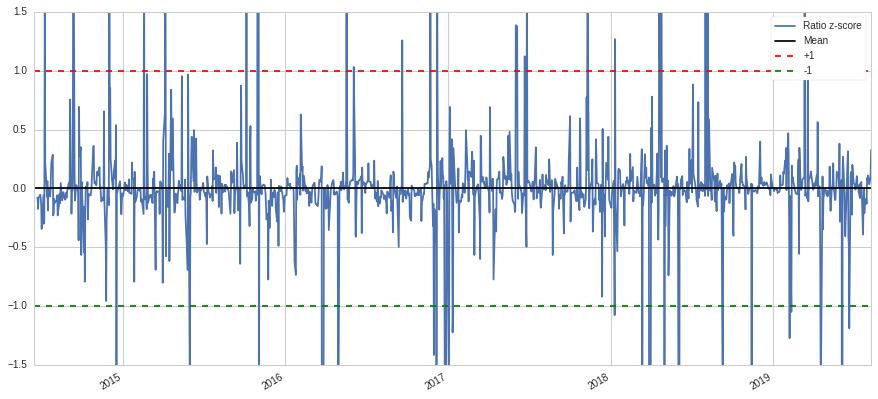

In [130]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.ylim(-1.5,1.5)
plt.show()



In [73]:
ratios = (slm_pct_chg / navi_pct_chg)
ratios = ratios.replace([np.inf, -np.inf], [-100,100])
train = ratios[:914]
test = ratios[914:]

ratios_close = NAVI['close_price'] / SLM['close_price']
train_close = ratios_close[:914]
test_close = ratios_close[914:]

In [350]:
ratios_mavg5 = train.rolling(window=5,center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60,center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60


2014-06-16 00:00:00+00:00         NaN
2014-06-17 00:00:00+00:00         NaN
2014-06-18 00:00:00+00:00         NaN
2014-06-19 00:00:00+00:00         NaN
2014-06-20 00:00:00+00:00         NaN
2014-06-23 00:00:00+00:00         NaN
2014-06-24 00:00:00+00:00         NaN
2014-06-25 00:00:00+00:00         NaN
2014-06-26 00:00:00+00:00         NaN
2014-06-27 00:00:00+00:00         NaN
2014-06-30 00:00:00+00:00         NaN
2014-07-01 00:00:00+00:00         NaN
2014-07-02 00:00:00+00:00         NaN
2014-07-03 00:00:00+00:00         NaN
2014-07-07 00:00:00+00:00         NaN
2014-07-08 00:00:00+00:00         NaN
2014-07-09 00:00:00+00:00         NaN
2014-07-10 00:00:00+00:00         NaN
2014-07-11 00:00:00+00:00         NaN
2014-07-14 00:00:00+00:00         NaN
2014-07-15 00:00:00+00:00         NaN
2014-07-16 00:00:00+00:00         NaN
2014-07-17 00:00:00+00:00         NaN
2014-07-18 00:00:00+00:00         NaN
2014-07-21 00:00:00+00:00         NaN
2014-07-22 00:00:00+00:00         NaN
2014-07-23 0

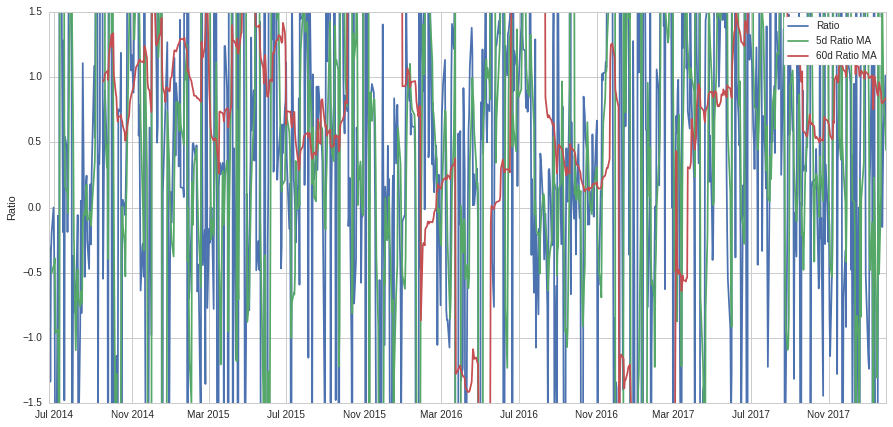

In [75]:
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.ylim(-1.5,1.5)
plt.show()

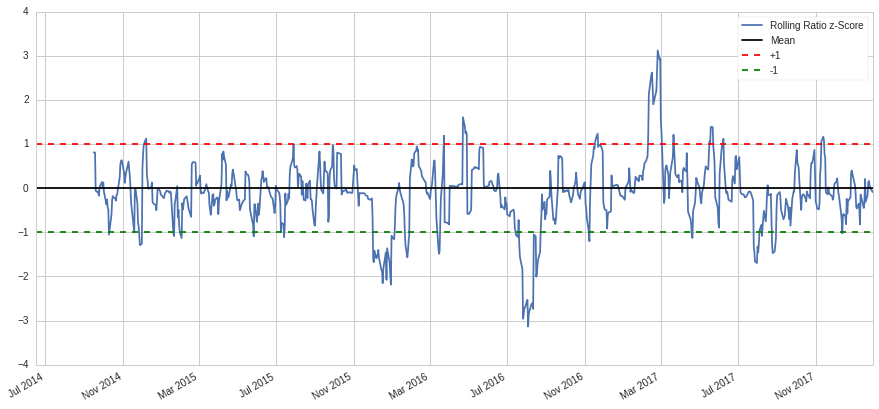

In [76]:
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=20,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

#plot
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

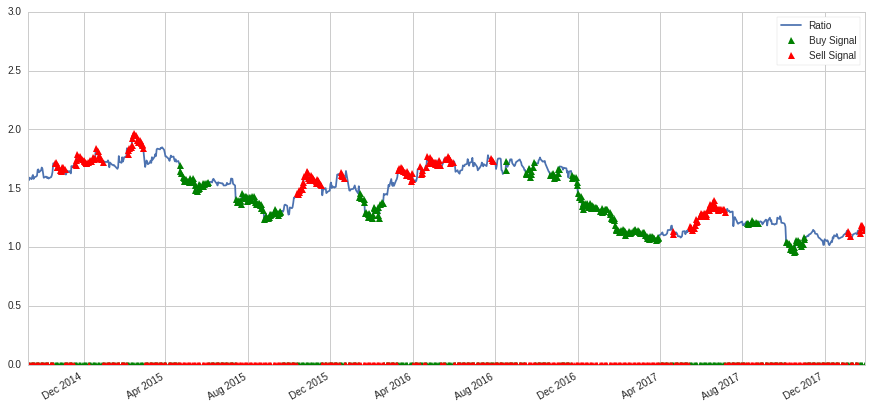

In [372]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train_close[60:].plot()
buy = train_close.copy()
sell = train_close.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.ylim(0,3)
plt.show()

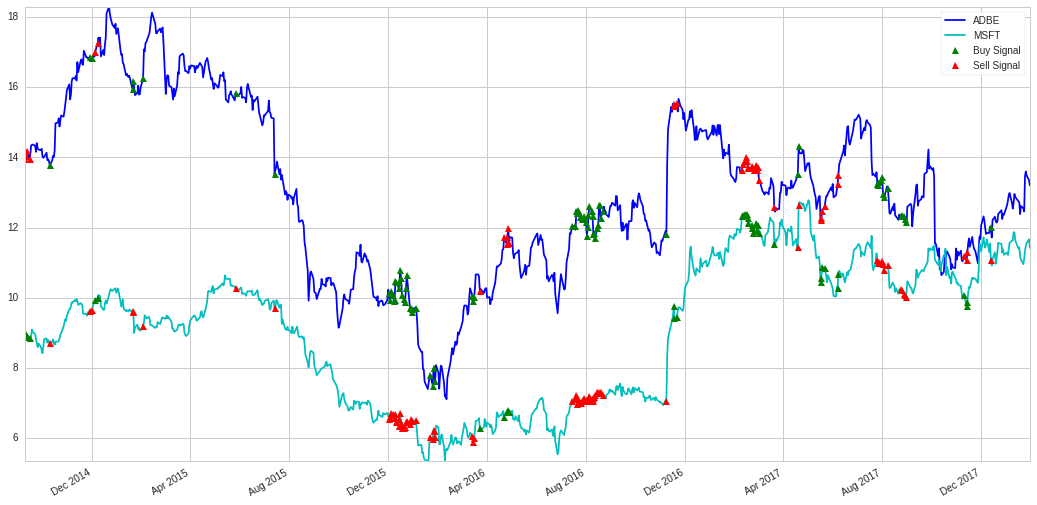

In [78]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 =NAVI['close_price'].iloc[:914]
S2 =SLM['close_price'].iloc[:914]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['ADBE','MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()

In [79]:
#Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money
trade(NAVI['close_price'].iloc[:914], SLM['close_price'].iloc[:914], 60, 5)

Selling Ratio 0.0 1.57509323087 -1 1.57509323087
Selling Ratio 0.0 1.57334536024 -2 3.14843859112
Selling Ratio 0.0 1.56747404844 -3 4.71591263956
Selling Ratio 1.7763568394e-15 1.58974646623 -4 6.30565910579
Selling Ratio 1.7763568394e-15 1.57602438198 -5 7.88168348778
Selling Ratio 1.7763568394e-15 1.59988636364 -6 9.48156985141
Selling Ratio 0.0 1.61232984588 -7 11.0938996973
Selling Ratio 1.7763568394e-15 1.57879687672 -8 12.672696574
Selling Ratio 1.7763568394e-15 1.59193173002 -9 14.264628304
Selling Ratio 1.7763568394e-15 1.59973211296 -10 15.864360417
Selling Ratio 1.7763568394e-15 1.60578559274 -11 17.4701460097
Exit pos -6.55208044539 1.65669925244 0 0
Exit pos -6.55208044539 1.65987661506 0 0
Buying Ratio -6.55208044539 1.65143587955 1 -1.65143587955
Buying Ratio -6.55208044539 1.67556758028 2 -3.32700345983
Buying Ratio -6.55208044539 1.66603302839 3 -4.99303648823
Buying Ratio -6.55208044539 1.62608998954 4 -6.61912647776
Buying Ratio -6.55208044539 1.58854875283 5 -8.2076

Buying Ratio 44.8051867133 1.23477011494 10 -11.7178096276
Buying Ratio 44.8051867133 1.21834758906 11 -12.9361572167
Buying Ratio 44.8051867133 1.26222264912 12 -14.1983798658
Buying Ratio 44.8051867133 1.26267414861 13 -15.4610540144
Buying Ratio 44.8051867133 1.29042003703 14 -16.7514740515
Buying Ratio 44.8051867133 1.27931960609 15 -18.0307936575
Buying Ratio 44.8051867133 1.28789389709 16 -19.3186875546
Buying Ratio 44.8051867133 1.26783807397 17 -20.5865256286
Buying Ratio 44.8051867133 1.28703433518 18 -21.8735599638
Buying Ratio 44.8051867133 1.2632268939 19 -23.1367868577
Buying Ratio 44.8051867133 1.28164174947 20 -24.4184286072
Buying Ratio 44.8051867133 1.32018080799 21 -25.7386094151
Buying Ratio 44.8051867133 1.31836467396 22 -27.0569740891
Buying Ratio 44.8051867133 1.32758459087 23 -28.38455868
Buying Ratio 44.8051867133 1.36144349478 24 -29.7460021748
Buying Ratio 44.8051867133 1.34652611404 25 -31.0925282888
Buying Ratio 44.8051867133 1.3859632771 26 -32.4784915659
B

-54.646251099867179

# MEDIUM STRAT

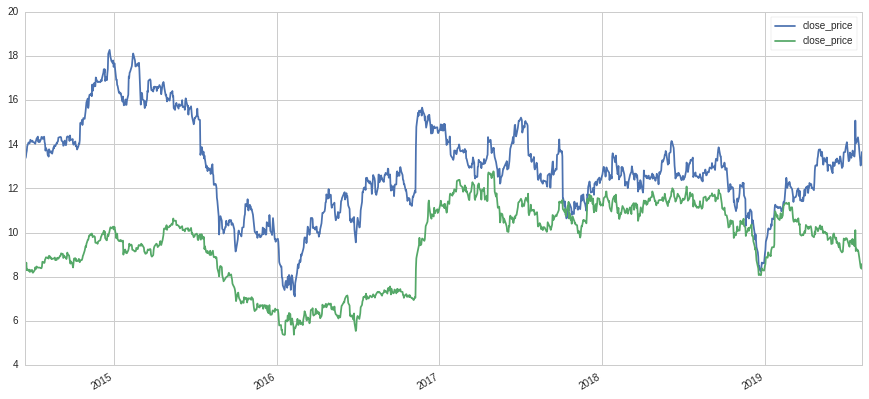

In [450]:
navi=NAVI['close_price']
slm=SLM['close_price']
pd.concat([navi,slm],axis=1).plot(figsize=(15,7))
plt.show()

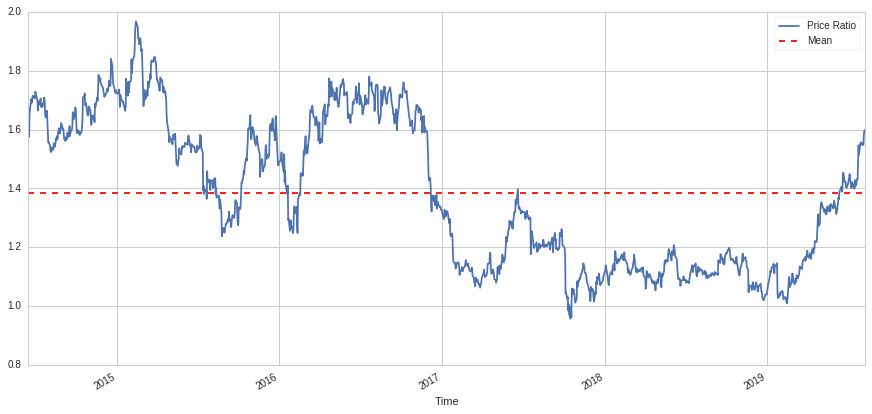

In [451]:
(navi/slm).plot(figsize=(15,7)) 
plt.axhline((navi/slm).mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

In [452]:
#compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(slm,navi)

In [453]:
ratios = (navi/slm)

In [454]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

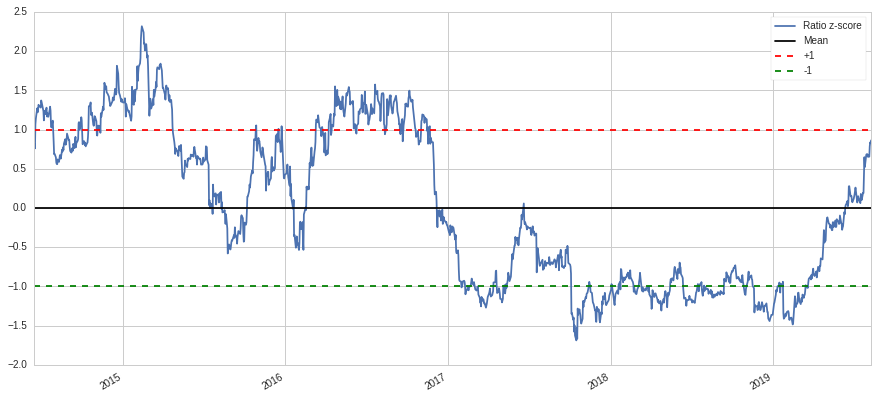

In [455]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

In [456]:
ratios = NAVI['close_price'] / SLM['close_price']
print(len(ratios))
train = ratios[:914]
test = ratios[914:]

1298


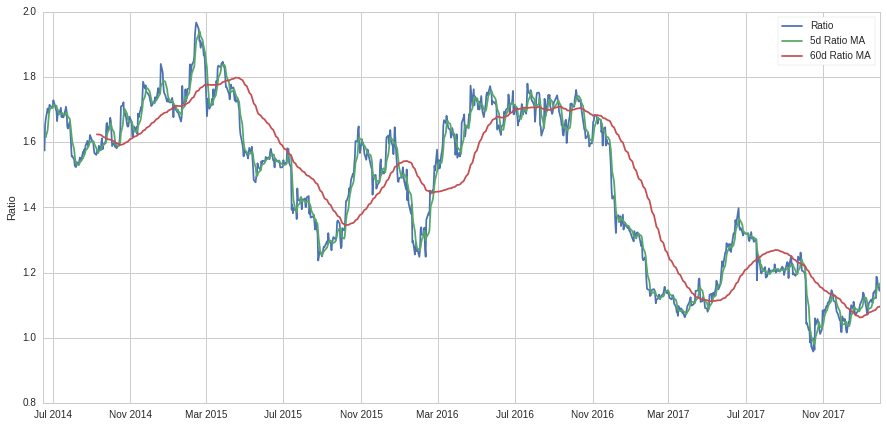

In [457]:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()

ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()

std_60 = train.rolling(window=60,
                        center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

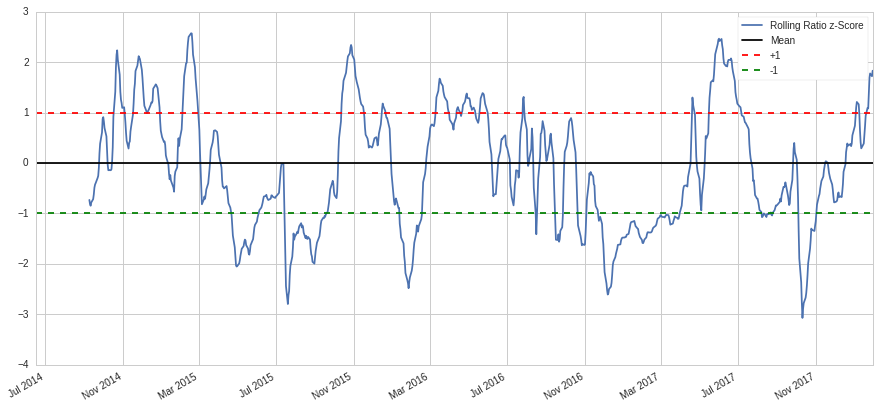

In [458]:
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

In [459]:
ratios = NAVI['close_price'] / SLM['close_price']
print(len(ratios))
train = ratios[:914]
test = ratios[914:]

train.head()

1298


2014-06-16 00:00:00+00:00    1.593422
2014-06-17 00:00:00+00:00    1.584986
2014-06-18 00:00:00+00:00    1.575151
2014-06-19 00:00:00+00:00    1.652840
2014-06-20 00:00:00+00:00    1.670907
Freq: C, Name: close_price, dtype: float64

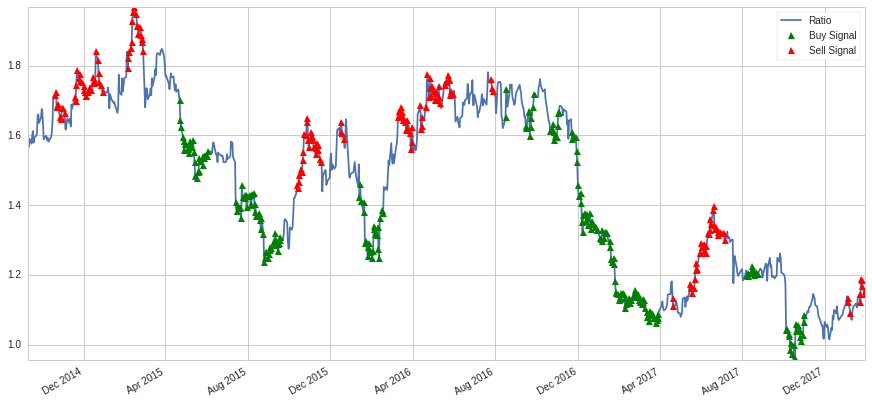

In [460]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [91]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money
trade(NAVI['close_price'].iloc[:914], SLM['close_price'].iloc[:914], 60, 5)

Selling Ratio 0.0 1.57509323087 -1 1.57509323087
Selling Ratio 0.0 1.57334536024 -2 3.14843859112
Selling Ratio 0.0 1.56747404844 -3 4.71591263956
Selling Ratio 1.7763568394e-15 1.58974646623 -4 6.30565910579
Selling Ratio 1.7763568394e-15 1.57602438198 -5 7.88168348778
Selling Ratio 1.7763568394e-15 1.59988636364 -6 9.48156985141
Selling Ratio 0.0 1.61232984588 -7 11.0938996973
Selling Ratio 1.7763568394e-15 1.57879687672 -8 12.672696574
Selling Ratio 1.7763568394e-15 1.59193173002 -9 14.264628304
Selling Ratio 1.7763568394e-15 1.59973211296 -10 15.864360417
Selling Ratio 1.7763568394e-15 1.60578559274 -11 17.4701460097
Exit pos -6.55208044539 1.65669925244 0 0
Exit pos -6.55208044539 1.65987661506 0 0
Buying Ratio -6.55208044539 1.65143587955 1 -1.65143587955
Buying Ratio -6.55208044539 1.67556758028 2 -3.32700345983
Buying Ratio -6.55208044539 1.66603302839 3 -4.99303648823
Buying Ratio -6.55208044539 1.62608998954 4 -6.61912647776
Buying Ratio -6.55208044539 1.58854875283 5 -8.2076

Selling Ratio -150.45402834 1.0763497847 -106 138.859162589
Selling Ratio -150.45402834 1.08773507768 -107 139.946897667
Selling Ratio -150.45402834 1.09733410846 -108 141.044231775
Selling Ratio -150.45402834 1.10846205507 -109 142.15269383
Selling Ratio -150.45402834 1.11490656971 -110 143.2676004
Selling Ratio -150.45402834 1.12423873325 -111 144.391839133
Selling Ratio -150.45402834 1.10555649384 -112 145.497395627
Selling Ratio -150.45402834 1.09856211336 -113 146.595957741
Selling Ratio -150.45402834 1.10301296078 -114 147.698970701
Selling Ratio -150.45402834 1.10863602361 -115 148.807606725
Selling Ratio -150.45402834 1.1154336193 -116 149.923040344
Exit pos 47.6557821751 1.1437897119 0 0
Exit pos 47.6557821751 1.14494988435 0 0
Exit pos 47.6557821751 1.17925601751 0 0
Buying Ratio 47.6557821751 1.18182612495 1 -1.18182612495
Buying Ratio 47.6557821751 1.1349382325 2 -2.31676435744
Buying Ratio 47.6557821751 1.10992378408 3 -3.42668814153
Exit pos 46.5362299169 1.11279381606 0 

-54.646251099867179

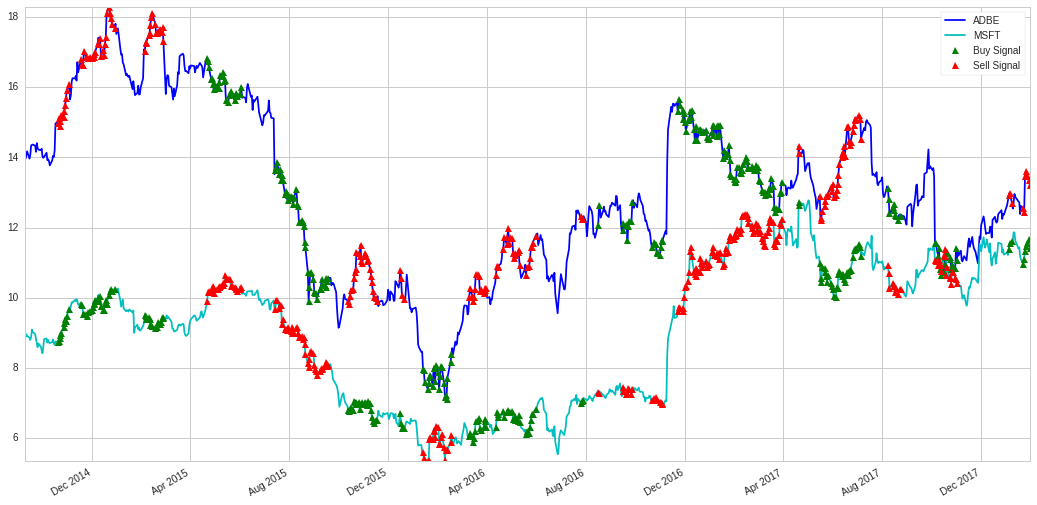

In [461]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 =NAVI['close_price'].iloc[:914]
S2 =SLM['close_price'].iloc[:914]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['ADBE','MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
buyR[buy!=0] = S1[buy!=0]

NameError: name 'slm' is not defined

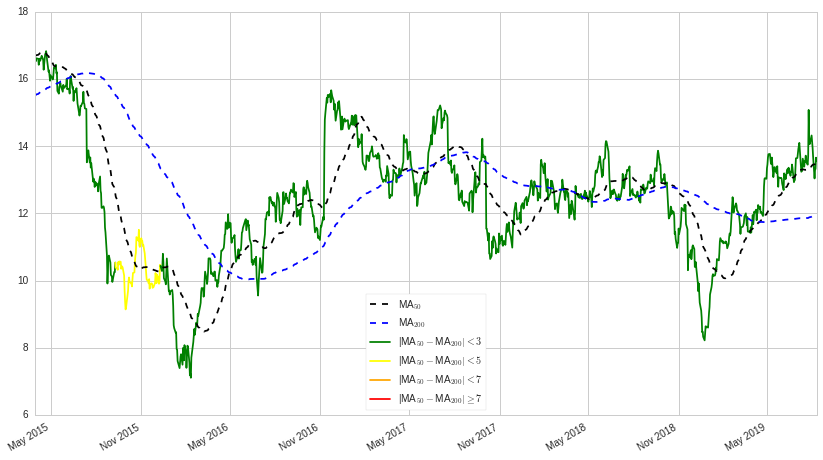

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Simulate data
np.random.seed(1234)
df = get_pricing('NAVI',start_date='2014-06-15',
                    end_date = '2019-08-10',
                    frequency= 'daily')
df['50dma'] = df['close_price'].rolling(window=50, center=False).mean()
df['200dma'] = df['close_price'].rolling(window=200, center=False).mean()

## Apply labels
df['label'] = 'out of bounds'
df.loc[abs(df['50dma'] - df['200dma']) >= 7, 'label'] = '|50dma - 200dma| >= 7'
df.loc[abs(df['50dma'] - df['200dma']) < 7, 'label'] = '|50dma - 200dma| < 7'
df.loc[abs(df['50dma'] - df['200dma']) < 5, 'label'] = '|50dma - 200dma| < 5'
df.loc[abs(df['50dma'] - df['200dma']) < 3, 'label'] = '|50dma - 200dma| < 3'
df = df[df['label'] != 'out of bounds']

## Convert labels to colors
label2color = {
    '|50dma - 200dma| < 3': 'green',
    '|50dma - 200dma| < 5': 'yellow',
    '|50dma - 200dma| < 7': 'orange',
    '|50dma - 200dma| >= 7': 'red',
}
df['color'] = df['label'].apply(lambda label: label2color[label])

# Create plot
fig, ax = plt.subplots()

def gen_repeating(s):
    """Generator: groups repeated elements in an iterable
    E.g.
        'abbccc' -> [('a', 0, 0), ('b', 1, 2), ('c', 3, 5)]
    """
    i = 0
    while i < len(s):
        j = i
        while j < len(s) and s[j] == s[i]:
            j += 1
        yield (s[i], i, j-1)
        i = j

## Add px_last lines
for color, start, end in gen_repeating(df['color']):
    if start > 0: # make sure lines connect
        start -= 1
    idx = df.index[start:end+1]
    df.loc[idx, 'close_price'].plot(ax=ax, color=color, label='')

## Add 50dma and 200dma lines
df['50dma'].plot(ax=ax, color='k', ls='--', label='MA$_{50}$')
df['200dma'].plot(ax=ax, color='b', ls='--', label='MA$_{200}$')

## Get artists and labels for legend and chose which ones to display
handles, labels = ax.get_legend_handles_labels()

## Create custom artists
g_line = plt.Line2D((0,1),(0,0), color='green')
y_line = plt.Line2D((0,1),(0,0), color='yellow')
o_line = plt.Line2D((0,1),(0,0), color='orange')
r_line = plt.Line2D((0,1),(0,0), color='red')

## Create legend from custom artist/label lists
ax.legend(
    handles + [g_line, y_line, o_line, r_line],
    labels + [
        '|MA$_{50} - $MA$_{200}| < 3$',
        '|MA$_{50} - $MA$_{200}| < 5$',
        '|MA$_{50} - $MA$_{200}| < 7$',
        '|MA$_{50} - $MA$_{200}| \geq 7$',
    ],
    loc='best',
)

# Display plot
plt.plot(slm)
plt.show()

In [ ]:
def initialize(context):
    context.techy = [sid(24), sid(1900), sid(16841)]
    
def handel_data(context,data):
    tech_close = data.current(context.techy, 'close')
    print(tech_close)
                       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# simulate data
# =============================
df= pd.concat([navi,spread,z_ratio],keys=["price","spread","z_ratio"],axis=1)


##Apply Labels 
df['label'] = 'out of bounds'
df.loc[df['z_ratio'] > 1 , 'label'] = 'zratio_o1'
df.loc[df['z_ratio'] < -1 , 'label'] = 'zratio_u1'
df.loc[df['spread'] > 0.040705 , 'label'] = 'spread_over_75'

## Convert labels to colors
label2color = {
    'out of bounds': 'grey',
    'zratio_o1': 'red',
    'zratio_u1': 'green',
    'spread_over_75': 'orange',
}
df['color'] = df['label'].apply(lambda label: label2color[label])



# plot
# =============================
df = df.dropna(axis=0, how='any')

fig, ax = plt.subplots()

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.plot(group.index, group.px_last, c=color, linewidth=lw)

#df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

#add ma lines
#x.plot(df.index, df['50dma'], 'k--', label='MA-50')
#ax.plot(df.index, df['200dma'], 'b--', label='MA-200')
#ax.legend(loc='best')

In [ ]:
#5 day percent change hovers at a mean
navi_pct5=NAVI['close_price'].pct_change(periods=5)
slm_pct5=SLM['close_price'].pct_change(periods=5)
sl=(navi_pct5/slm_pct5)
dl=sl.replace([np.inf, -np.inf], np.nan)
dl.dropna(inplace=True)
dl.mean()
#ratios = ratios.replace([np.inf, -np.inf], [-100,100])


sl.plot(figsize=(15,7))
plt.axhline(dl.mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.axhline(dl.dropna().describe()[4], color='blue', linestyle='--')
plt.axhline(dl.dropna().describe()[6], color='blue', linestyle='--')
plt.legend(['Price Ratio', 'Mean'])
plt.ylim(-50,50)
plt.show()

In [ ]:
plt.plot(navi_pct1)
plt.plot(slm_pct1)
plt.plot(dl)
sl.plot(figsize=(17,7))
plt.axhline(dl.mean(), color='red', linestyle='--') 
plt.xlim('2015-01-01','2016-07-30')
plt.ylim(-.3,.4)
plt.plot(grid=True)


In [ ]:
#airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
#airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
#exponesional weighted moving average